<a href="https://colab.research.google.com/github/utsavdatta-git/Neural-Machine-Translation/blob/master/English_to_Bengali_Machine_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine translation Model

The following models are created to do basic English to Bengali machine translations using sequence-2-sequence encoder to decoder model

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec
import gensim.downloader as api
nltk.download("punkt")
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, Bidirectional, add, dot, concatenate, Reshape, LSTM, Softmax, GRU, RepeatVector, Dense, Activation, Lambda
from keras.activations import softmax
from keras.utils.data_utils import get_file
from keras.preprocessing.sequence import pad_sequences, utils
from keras.utils import plot_model, to_categorical
from keras import layers, optimizers
from IPython.display import display, Image
from functools import reduce
import tarfile
import numpy as np
import re
from keras.preprocessing.text import Tokenizer
from keras.backend import sum

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Using TensorFlow backend.


In [0]:
#-----------------------------------------------------------------------------
# Function name: text_preprocess
# Purpose: This fuction pre-processes an input text through a series of pre-processing pipelines.
#          It has been implemented as a function to be used as a common function 
#          to pre-process texts at any stage of the assignment             
# Input: a string of text
# Output: preprocessed list of words
#-----------------------------------------------------------------------------
from gensim.parsing.preprocessing import preprocess_string,strip_punctuation, strip_numeric, strip_multiple_whitespaces, strip_non_alphanum
def text_preprocess(text_in):
  #Strip leading and trailing spaces and De-capitalize
  text = str(text_in).strip().lower()
  #These are just common English contractions as much as possible
  contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
  #Removing contractions
  text_cleaned = " ".join([contraction_dict.get(x,x) for x in text.split()])
  
  #Removing punctuations, removing numbers and mupliple spaces
  CUSTOM_FILTERS = [lambda x: x, strip_punctuation, strip_multiple_whitespaces, strip_non_alphanum]
  dialogues_list_preprocessed = preprocess_string(text, CUSTOM_FILTERS)
  
  dialogues_list_preprocessed = [x.replace("’","") for x in dialogues_list_preprocessed]
  
  return dialogues_list_preprocessed

In [0]:
# Read the translation dataset
df_ben=pd.read_csv(r'/content/drive/My Drive/Cousera files/ben-eng/ben.txt', delimiter ='\t',error_bad_lines=False, header=None)

In [0]:
# Shuffle the dataset for randomness
df_ben = df_ben.sample(frac=1)

In [0]:
#Pre-process english words
english_train = [' '.join(text_preprocess(x)) for x in list(df_ben[0])]

tokenizer_english = Tokenizer(oov_token="<OOV>")
tokenizer_english.fit_on_texts(english_train)
sequences_english = tokenizer_english.texts_to_sequences(english_train)
word_index_english = tokenizer_english.word_index
print('Found %s unique tokens.' % len(word_index_english))

vocab_size_english = len(word_index_english)+1
print( 'VOCAB SIZE : {}'.format( vocab_size_english ))
max_english_len = max([len(x.split()) for x in list(df_ben[0])])

# question input data (for encoder)
data_english = pad_sequences(sequences_english, maxlen=max_english_len, padding='post')

Found 1829 unique tokens.
VOCAB SIZE : 1830


In [0]:
# Put start token and end token to every bengali sentence
token_appended_bengali = ["start "+x+" end" for x in list(df_ben[1])]
#Pre-process bengali words
tokenizer_bengali = Tokenizer(oov_token="<OOV>")
tokenizer_bengali.fit_on_texts(token_appended_bengali)

decoder_input_bengali = [' '.join(x.split()[:-1]) for x in token_appended_bengali]
decoder_target_bengali = [' '.join(x.split()[1:]) for x in token_appended_bengali]

decoder_input_sequences_bengali = tokenizer_bengali.texts_to_sequences(decoder_input_bengali)
decoder_target_sequences_bengali = tokenizer_bengali.texts_to_sequences(decoder_target_bengali)
word_index_bengali = tokenizer_bengali.word_index
print('Found %s unique tokens.' % len(word_index_bengali))

vocab_size_bengali = len(word_index_bengali)+1
print( 'VOCAB SIZE : {}'.format( vocab_size_bengali ))
max_bengali_len = max([len(x.split()) for x in token_appended_bengali])

# question input data (for encoder)
decoder_input = pad_sequences(decoder_input_sequences_bengali, maxlen=max_bengali_len, padding='post')
decoder_target = pad_sequences(decoder_target_sequences_bengali, maxlen=max_bengali_len, padding='post')

Found 3325 unique tokens.
VOCAB SIZE : 3326


In [0]:
# one hot encoding english and bengali data
english_one_hot = to_categorical(data_english)
bengali_one_hot = to_categorical(decoder_input) 
decoder_target_one_hot = to_categorical(decoder_target)

In [0]:
print("Shape of encoder input : {}".format(english_one_hot.shape))
print("Shape of decoder input : {}".format(bengali_one_hot.shape))
print("Shape of decoder target : {}".format(decoder_target_one_hot.shape))

Shape of encoder input : (4356, 19, 1830)
Shape of decoder input : (4356, 20, 3326)
Shape of decoder target : (4356, 20, 3326)


In [0]:
# Put aside last 100 rows for testing
encoder_input_train = english_one_hot[:4256,:,:]
decoder_input_train = bengali_one_hot[:4256,:,:]
decoder_output_train = decoder_target_one_hot[:4256,:,:]

encoder_input_test = english_one_hot[4256:,:,:]
decoder_input_test = bengali_one_hot[4256:,:,:]
decoder_output_test = decoder_target_one_hot[4256:,:,:]

In [0]:
latent_dim=32
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, vocab_size_english))
encoder = Bidirectional(LSTM(latent_dim, return_state=True)) # Make it Bi directional
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(encoder_inputs)
state_h = concatenate([forward_h, backward_h])
state_c = concatenate([forward_c, backward_c])
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, vocab_size_bengali))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the 
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(vocab_size_bengali, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

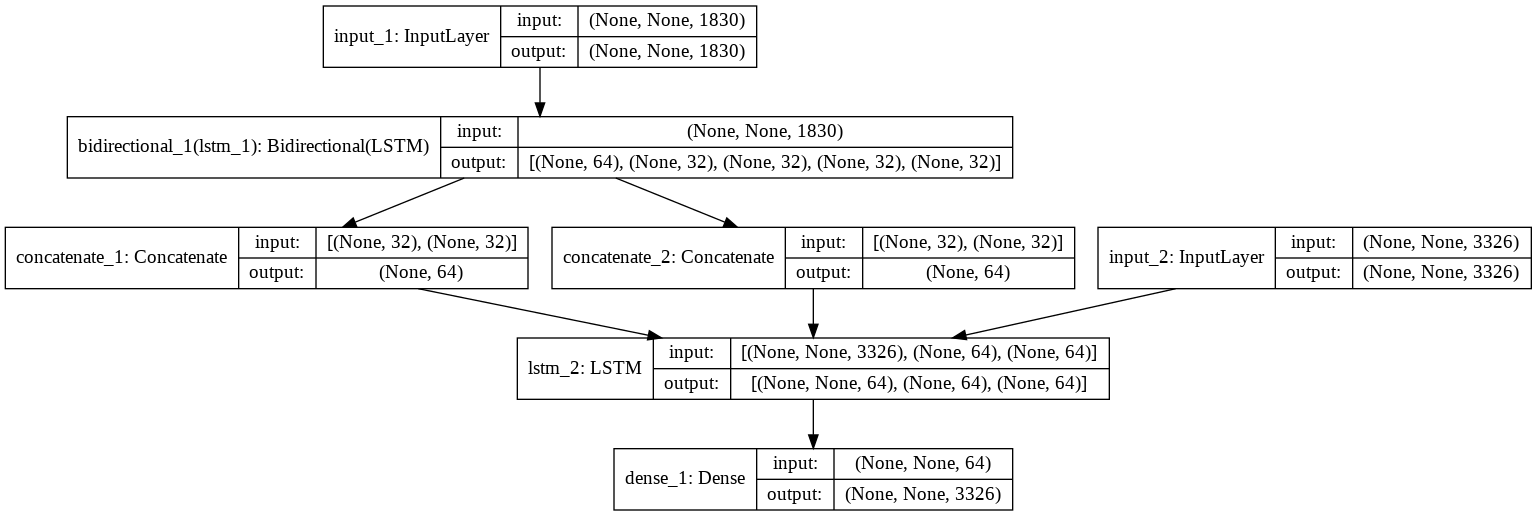

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 1830)   0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) [(None, 64), (None,  476928      input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 3326)   0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 64)           0           bidirectional_1[0][1]            
                                                                 bidirectional_1[0][3]      

In [0]:
# plot graph
plot_model(model, to_file='s2s.png', show_shapes=True)
# display graph
display(Image(filename='s2s.png'))

# summarize layers
print(model.summary())

In [0]:
# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=["accuracy"])

In [0]:
model.fit([encoder_input_train, decoder_input_train], decoder_output_train,
          batch_size=32,
          epochs=200,
          validation_split=0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 3830 samples, validate on 426 samples
Epoch 1/200





3830/3830 [==============================] - 20s 5ms/step - loss: 2.9162 - acc: 0.7253 - val_loss: 1.8370 - val_acc: 0.7214
Epoch 2/200
3830/3830 [==============================] - 10s 3ms/step - loss: 1.6555 - acc: 0.7501 - val_loss: 1.7081 - val_acc: 0.7588
Epoch 3/200
3830/3830 [==============================] - 10s 3ms/step - loss: 1.5498 - acc: 0.7710 - val_loss: 1.6401 - val_acc: 0.7671
Epoch 4/200
3830/3830 [==============================] - 10s 3ms/step - loss: 1.4787 - acc: 0.7873 - val_loss: 1.5865 - val_acc: 0.7837
Epoch 5/200
3830/3830 [==============================] - 10s 3ms/step - loss: 1.4268 - acc: 0.7935 - val_loss: 1.5384 - val_acc: 0.7858
Epoch 6/200
3830/3830 [==============================] - 10s 3ms/step - loss: 1.3861 - acc: 0.7948 - val_loss: 1.5054 - val_acc: 0.7881
Epoch 7/200
3830/3830 [============

In [0]:
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(64,))
decoder_state_input_c = Input(shape=(64,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [0]:
reverse_target_char_index = {idx:word for word,idx in word_index_bengali.items()}

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, vocab_size_bengali))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, word_index_bengali['start']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == 'end'):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, vocab_size_bengali))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence.replace("end","").strip()

In [0]:
from numpy import newaxis
bengali_sent_truth = list(df_ben[1])[4256:]
for english_sent,original_beng,beng_trans in zip(english_train[4256:],bengali_sent_truth,encoder_input_test) :
  print("Original english: "+english_sent)
  print("Ground truth translation: "+original_beng)
  translation_prediction = decode_sequence(beng_trans[newaxis,:,:])
  print("Prediction: "+ translation_prediction+"\n")

Original english: that s a good idea
Ground truth translation: খুব ভাল বুদ্ধি!
Prediction: ভালো ওটা আমি খাও।

Original english: you re sitting in my seat
Ground truth translation: আপনি আমার সীটে বসে আছেন।
Prediction: আপনি কি আমার এখানে যাওয়ার আছে।

Original english: tom hardly ever keeps his word
Ground truth translation: টম খুব কমই ওনার কথা রাখেন।
Prediction: টম খুব কমই ওর কথা রাখে।

Original english: is he a teacher
Ground truth translation: ও কি শিক্ষক?
Prediction: উনি কি শিক্ষক

Original english: earthquakes and floods are natural disasters
Ground truth translation: ভুমিকম্প আর বন্যা প্রকৃতিক বিপর্যয়।
Prediction: আর উনি সময় তুই নেই।

Original english: she is eating
Ground truth translation: উনি খাচ্ছেন।
Prediction: সে খাচ্ছে।

Original english: who broke the vase
Ground truth translation: ফুলদানিটা কে ভাঙল?
Prediction: কে কে

Original english: i am counting on you
Ground truth translation: আমি আপনার উপর নির্ভর করে আছি।
Prediction: আমি তোমার উপর নির্ভর করে সেটা আছি।

Original engli

# Machine translation model using Glove word vectors for english sentences rather than one hot encodings as used in the previous model

In [0]:
embedding_size=100
latent_dim = 32
encoder_inputs = Input(shape=(None,))
# English words embedding
en_x=  Embedding(vocab_size_english, embedding_size)(encoder_inputs)
# Encoder lstm
encoder = Bidirectional(LSTM(latent_dim, return_state=True)) # Make it Bi directional
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(en_x)
state_h = concatenate([forward_h, backward_h])
state_c = concatenate([forward_c, backward_c])
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
# french word embeddings
dex=  Embedding(vocab_size_bengali, embedding_size)
final_dex= dex(decoder_inputs)
# decoder lstm
decoder_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(final_dex, initial_state=encoder_states)
decoder_dense = Dense(vocab_size_bengali, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
# While training, model takes eng and french words and outputs #translated french word
model_2 = Model([encoder_inputs, decoder_inputs], decoder_outputs)
# rmsprop is preferred for nlp tasks
model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

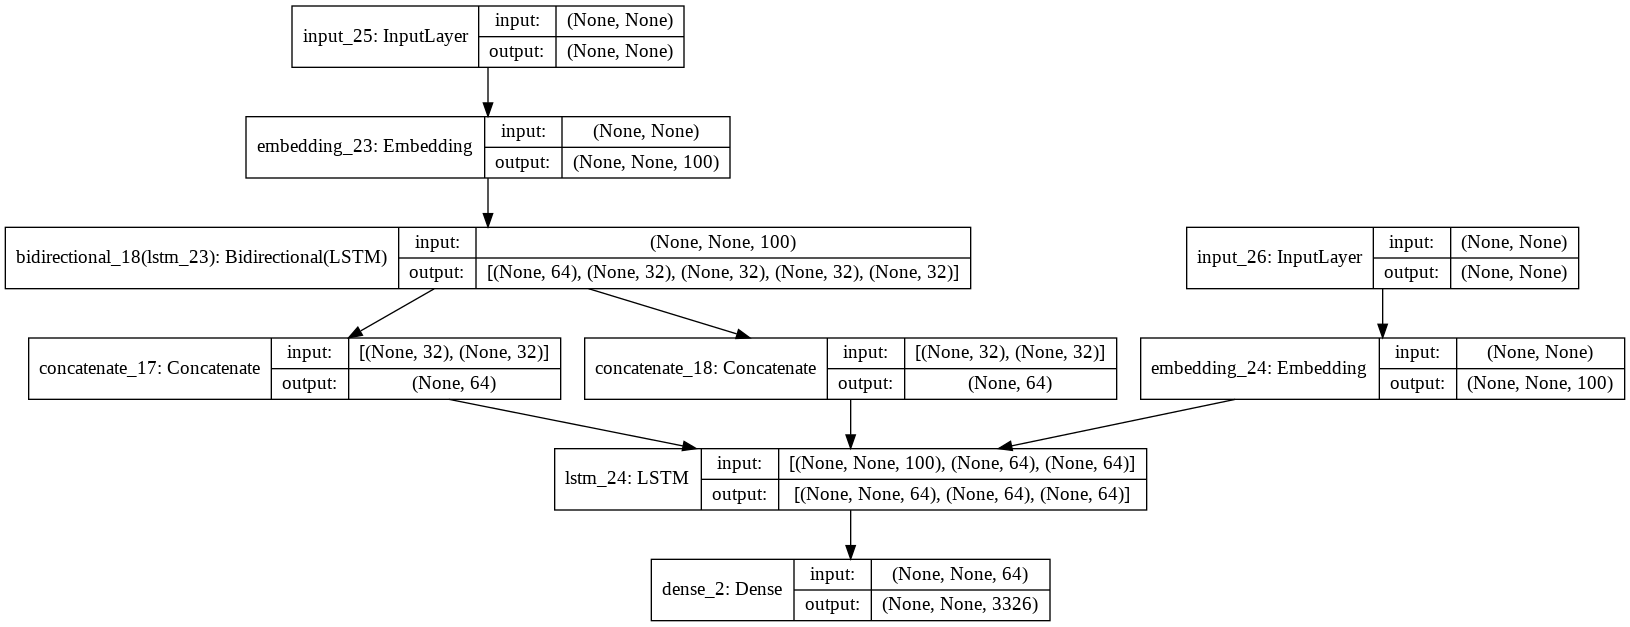

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
embedding_23 (Embedding)        (None, None, 100)    183000      input_25[0][0]                   
__________________________________________________________________________________________________
input_26 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
bidirectional_18 (Bidirectional [(None, 64), (None,  34048       embedding_23[0][0]               
____________________________________________________________________________________________

In [0]:
# plot graph
plot_model(model_2, to_file='s2s2.png', show_shapes=True)
# display graph
display(Image(filename='s2s2.png'))

# summarize layers
print(model_2.summary())

In [0]:
# Getting the right input data and dividing into train and test
data_english_train = data_english[:4256]
data_english_test = data_english[4256:]
data_bengali_train = decoder_input[:4256]
data_bengali_test = decoder_input[4256:]

In [0]:
model_2.fit([data_english_train, data_bengali_train], decoder_output_train,batch_size=32,epochs=100,validation_split=0.02)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4170 samples, validate on 86 samples
Epoch 1/100
4170/4170 [==============================] - 23s 6ms/step - loss: 2.7096 - acc: 0.7251 - val_loss: 1.7199 - val_acc: 0.7221
Epoch 2/100
4170/4170 [==============================] - 20s 5ms/step - loss: 1.5294 - acc: 0.7837 - val_loss: 1.5564 - val_acc: 0.7826
Epoch 3/100
4170/4170 [==============================] - 21s 5ms/step - loss: 1.4149 - acc: 0.7924 - val_loss: 1.5024 - val_acc: 0.7837
Epoch 4/100
4170/4170 [==============================] - 20s 5ms/step - loss: 1.3560 - acc: 0.7971 - val_loss: 1.4785 - val_acc: 0.7849
Epoch 5/100
4170/4170 [==============================] - 19s 5ms/step - loss: 1.3126 - acc: 0.8000 - val_loss: 1.4518 - val_acc: 0.7895
Epoch 6/100
4170/4170 [==============================] - 19s 5ms/step - loss: 1.2774 - acc: 0.8019 - val_loss: 1.4260 - val_acc: 0.7890
Epoch 7/100
4170/4170 [===================

In [0]:
# define the encoder model 
encoder_model = Model(encoder_inputs, encoder_states)
encoder_model.summary()
# Redefine the decoder model with decoder will be getting below inputs from encoder while in prediction
decoder_state_input_h = Input(shape=(64,))
decoder_state_input_c = Input(shape=(64,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
final_dex2 = dex(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(final_dex2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)
# sampling model will take encoder states and decoder_input(seed initially) and output the predictions(french word index) We dont care about decoder_states2
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 100)    183000      input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) [(None, 64), (None,  34048       embedding_1[0][0]                
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 64)           0           bidirectional_1[0][1]            
                                                                 bidirectional_1[0][3]      

In [0]:
encoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 100)    183000      input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) [(None, 64), (None,  34048       embedding_1[0][0]                
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 64)           0           bidirectional_1[0][1]            
                                                                 bidirectional_1[0][3]      

In [0]:
decoder_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 100)    332600      input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 64)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 64)           0                                            
____________________________________________________________________________________________

In [0]:
def decode_sequence_embedding(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = word_index_bengali['start']
# Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)
# Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char
# Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == 'end' or
           len(decoded_sentence) > 52):
            stop_condition = True
# Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
# Update states
        states_value = [h, c]
    return decoded_sentence.replace("end","").strip()

In [0]:
for english_sent,original_beng,eng_input in zip(list(df_ben[0])[4256:],list(df_ben[1])[4256:],data_english_test) :
  print("Original english: "+english_sent)
  print("Ground truth translation: "+original_beng)
  translation_prediction = decode_sequence_embedding(eng_input)
  print("Prediction: "+ translation_prediction+"\n")

Original english: How did you come to know her?
Ground truth translation: তুমি ওকে চিনলে কি কোরে?
Prediction: ওনারা ট্রেনটা কে আমাদের বোন।

Original english: Noodles are usually made from wheat.
Ground truth translation: নুডলস সাধারণত ময়দা দিয়ে তৈরি হয়।
Prediction: ওনারা টমকে ভয় চিঠি এই নুডলস সময় চাই।

Original english: He told me he would go to Venice.
Ground truth translation: তিনি আমাকে বলেছিলেন যে তিনি ভেনিস যাবেন।
Prediction: ওনারা উনি কে যে সেটা চিৎকার করা সবাই বললো।

Original english: Do you hate me?
Ground truth translation: আপনি কি আমাকে ঘৃণা করেন?
Prediction: ওনারা গেলাম।

Original english: Tom has come to pick up his children.
Ground truth translation: টম ওর বাচ্চাদের নিতে এসেছে।
Prediction: টম অসুস্থ।

Original english: I used to play tennis.
Ground truth translation: আমি টেনিস খেলতাম।
Prediction: আমি পেট বিশ্বাস করতে চাই।

Original english: He can read.
Ground truth translation: উনি পড়তে পারেন।
Prediction: ওনারা উনি কে যে সেটা চিৎকার করা সবাই বললো।

Original english: If he